In [1465]:
import pandas as pd
import json
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## CLEANING DATA

In [1466]:
# Load the data into a pandas DataFrame
energy = pd.read_csv('CO2/energy.csv')

In [1467]:
energy.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [1468]:
#Drop column
energy = energy.drop('Unnamed: 0', axis=1)

In [1469]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   Energy_type                  55440 non-null  object 
 2   Year                         55440 non-null  int64  
 3   Energy_consumption           44287 non-null  float64
 4   Energy_production            44289 non-null  float64
 5   GDP                          40026 non-null  float64
 6   Population                   46014 non-null  float64
 7   Energy_intensity_per_capita  50358 non-null  float64
 8   Energy_intensity_by_GDP      50358 non-null  float64
 9   CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.2+ MB


In [1470]:
energy.describe()

,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,55440.0000,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,1999.5000,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,11.5435,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,1980.0000,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,1989.7500,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,1999.5000,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,2009.2500,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,2019.0000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


In [1471]:
#check duplicates
energy.duplicated().sum()


0

In [1472]:
#explore countries
energy['Country'].unique()

array(['World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo-Brazzaville',
       'Congo-Kinshasa', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Côte d’Ivoire', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',

In [1473]:
energy[energy['Country'] == 'Former Yugoslavia']
energy[energy['Country'] == 'Former U.S.S.R.']
energy[energy['Country'] == 'Former Serbia and Montenegro']
energy[energy['Country'] == 'Hungary']
# energy[energy['Country'] == 'Poland']



,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
582,Hungary,all_energy_types,1980,1.168933,0.521931,NaN,10711.540,109.128359,0.000000,NaN
583,Hungary,coal,1980,0.227510,0.177160,NaN,10711.540,109.128359,0.000000,NaN
584,Hungary,natural_gas,1980,0.350880,0.224595,NaN,10711.540,109.128359,0.000000,NaN
585,Hungary,petroleum_n_other_liquids,1980,0.521554,0.119023,NaN,10711.540,109.128359,0.000000,NaN
586,Hungary,nuclear,1980,0.000000,0.000000,NaN,10711.540,109.128359,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
54637,Hungary,coal,2019,0.087017,0.045387,309.9521,9770.737,108.211830,3.411202,9.423677
54638,Hungary,natural_gas,2019,0.367912,0.058079,309.9521,9770.737,108.211830,3.411202,19.169263
54639,Hungary,petroleum_n_other_liquids,2019,0.366582,0.048293,309.9521,9770.737,108.211830,3.411202,20.880865
54640,Hungary,nuclear,2019,0.155150,0.155150,309.9521,9770.737,108.211830,3.411202,0.000000


In [1474]:
#Drop Countries that do not exist anymore
dropCountry= ['Former Czechoslovakia', 'Former Serbia and Montenegro','Former U.S.S.R.', 'Former Yugoslavia', 'Germany, East',
       'Germany, West', 'Hungary', 'Poland']

for country in dropCountry:
    value = energy[energy['Country']==country].index
    energy.drop(labels=value, axis=0, inplace=True)

In [1475]:
energy[energy['Country'] == 'South Sudan']


,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1146,South Sudan,all_energy_types,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1147,South Sudan,coal,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1148,South Sudan,natural_gas,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,South Sudan,petroleum_n_other_liquids,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,South Sudan,nuclear,1980,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...
55201,South Sudan,coal,2019,0.000000,0.000000,17.3349,11062.1,2.404033,1.534111,0.000000
55202,South Sudan,natural_gas,2019,0.000000,0.000000,17.3349,11062.1,2.404033,1.534111,0.000000
55203,South Sudan,petroleum_n_other_liquids,2019,0.026558,0.291543,17.3349,11062.1,2.404033,1.534111,1.675889
55204,South Sudan,nuclear,2019,NaN,NaN,17.3349,11062.1,2.404033,1.534111,0.000000


In [1476]:
# Drop rows with 7 or less non NaN values. These are for countries that did not exist during certain years. 
energy.dropna(thresh=7, axis=0, inplace=True)

In [1477]:
#check missing values
for item in energy:
    print(f'{item}: {energy[item].isnull().sum()}')

Country: 0
Energy_type: 0
Year: 0
Energy_consumption: 6292
Energy_production: 6291
GDP: 10202
Population: 4310
Energy_intensity_per_capita: 984
Energy_intensity_by_GDP: 984
CO2_emission: 1217


In [1478]:
# energy.groupby('Year')['CO2_emission'].count()

In [1479]:
#We need CO2 emissions, therefore dropped nulls under CO2_emission column. 
energy.dropna(subset=['CO2_emission'], inplace=True)

In [1480]:
#Split nuclear from the rest of dataset
nuclear= energy[energy['Energy_type']== 'nuclear']
#Replace NaN to 0
nuclear[['Energy_consumption']] = nuclear[['Energy_consumption']].replace(np.nan, 0)
nuclear[['Energy_production']] = nuclear[['Energy_production']].replace(np.nan, 0)

c:\Users\clope\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1481]:
nuclear.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
4,World,nuclear,1980,7.5757,7.5757,27770.910281,4.298127e+06,68.145921,10.547,0.0
10,Afghanistan,nuclear,1980,0.0000,0.0000,NaN,1.335650e+04,1.990283,0.000,0.0
16,Albania,nuclear,1980,0.0000,0.0000,NaN,2.682700e+03,60.752906,0.000,0.0
22,Algeria,nuclear,1980,0.0000,0.0000,NaN,1.922170e+04,40.615303,0.000,0.0
28,American Samoa,nuclear,1980,0.0000,0.0000,NaN,3.264600e+01,180.515604,0.000,0.0


In [1482]:

#The rest of the main dataset
energy2= energy[energy['Energy_type'] != 'nuclear']
#Combine the split datasets
energy= pd.concat([nuclear, energy2]).sort_index()


In [1483]:
energy.head(20)

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
5,World,renewables_n_other,1980,20.702344,20.775178,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
10,Afghanistan,nuclear,1980,0.000000,0.000000,NaN,1.335650e+04,1.990283,0.000000,0.000000
11,Afghanistan,renewables_n_other,1980,0.007386,0.007386,NaN,1.335650e+04,1.990283,0.000000,0.000000
16,Albania,nuclear,1980,0.000000,0.000000,NaN,2.682700e+03,60.752906,0.000000,0.000000
17,Albania,renewables_n_other,1980,0.028897,0.030323,NaN,2.682700e+03,60.752906,0.000000,0.000000


In [1484]:
energy['Country'].value_counts()

World                  240
United States          240
Senegal                236
Ethiopia               236
Bahrain                236
                      ... 
Montenegro              80
Serbia                  80
Kosovo                  68
South Sudan             44
Hawaiian Trade Zone     31
Name: Country, Length: 223, dtype: int64

In [1485]:
#Group nulls under GDP & Country to find which countries have more than 90 GDP values. 90 is close to a 40% cutoff
gdpnull = energy['GDP'].isnull().groupby(energy['Country']).sum()
gdp_nulls= pd.DataFrame(gdpnull).reset_index()

In [1486]:
GDP90 = gdp_nulls[gdp_nulls['GDP']>=90]
GDP90

,Country,GDP
3,American Samoa,134.0
5,Antarctica,196.0
45,Cook Islands,196.0
64,Falkland Islands,196.0
65,Faroe Islands,183.0
69,French Guiana,196.0
70,French Polynesia,196.0
76,Gibraltar,196.0
81,Guam,134.0
126,Micronesia,161.0


In [1487]:
gdplist= [x for x in GDP90['Country']]

In [1488]:
gdplist

['American Samoa',
 'Antarctica',
 'Cook Islands',
 'Falkland Islands',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Guam',
 'Micronesia',
 'Montserrat',
 'Nauru',
 'New Caledonia',
 'Niue',
 'Northern Mariana Islands',
 'Saint Helena',
 'Saint Pierre and Miquelon',
 'Turks and Caicos Islands',
 'Tuvalu',
 'U.S. Pacific Islands',
 'U.S. Territories',
 'Wake Island',
 'Western Sahara']

In [1489]:
#Dropping countries with too many GDP nulls
for country in gdplist:
    value = energy[energy['Country']==country].index
    energy.drop(labels=value, axis=0, inplace=True)

In [1490]:
energy.columns

Index(['Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission'],
      dtype='object')

In [1491]:
energy.groupby('Year')['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission'].count()

<ipython-input-1491-d884754b4c54>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
Year,,,,,,,
1980,336,336,109,331,331,331,336
1981,1003,1003,310,978,979,979,1003
1982,1003,1003,310,978,979,979,1003
1983,1003,1003,310,978,979,979,1003
1984,1003,1003,310,978,979,979,1003
1985,1003,1003,310,978,979,979,1003
1986,1005,1005,310,980,981,981,1005
1987,1004,1004,310,984,980,980,1004
1988,1008,1008,972,1008,984,984,1008


In [1492]:
#GDP is low for countries between 1980 and 1987. Excluding years before 1988
energy= energy[energy['Year']>= 1988]

In [1493]:
energy.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
11088,World,all_energy_types,1988,345.560876,347.412863,42106.595403,4.927545e+06,70.128405,8.206811,21163.840556
11089,World,coal,1988,96.873178,98.484482,42106.595403,4.927545e+06,70.128405,8.206811,8930.924825
11090,World,natural_gas,1988,71.010048,71.852938,42106.595403,4.927545e+06,70.128405,8.206811,3571.676242
11091,World,petroleum_n_other_liquids,1988,133.445814,132.485303,42106.595403,4.927545e+06,70.128405,8.206811,8661.239490
11092,World,nuclear,1988,19.226897,19.226897,42106.595403,4.927545e+06,70.128405,8.206811,0.000000


In [1494]:
energy['Energy_type'].value_counts()

renewables_n_other           6167
all_energy_types             6137
coal                         6137
natural_gas                  6137
petroleum_n_other_liquids    6132
nuclear                      6007
Name: Energy_type, dtype: int64

In [1495]:
eip= pd.DataFrame(energy['Energy_intensity_by_GDP'].isnull().groupby(energy['Country']).sum()).reset_index()

eip= eip[eip['Energy_intensity_by_GDP'] > 0]

In [1496]:
eip

,Country,Energy_intensity_by_GDP
70,Greenland,155.0
80,Iceland,160.0
124,Netherlands Antilles,160.0
180,Trinidad and Tobago,160.0
184,U.S. Virgin Islands,160.0


In [1497]:
eiplist= [x for x in eip['Country']]

In [1498]:
#Dropping countries from eiplist
for country in eiplist:
    value = energy[energy['Country']==country].index
    energy.drop(labels=value, axis=0, inplace=True)

In [1499]:
#Rechecking missing values
for item in energy:
    print(f'{item}: {energy[item].isnull().sum()}')

Country: 0
Energy_type: 0
Year: 0
Energy_consumption: 0
Energy_production: 0
GDP: 128
Population: 0
Energy_intensity_per_capita: 0
Energy_intensity_by_GDP: 0
CO2_emission: 0


In [1500]:
energy.shape

(35922, 10)

In [1501]:
#Dropped missing values
energy = energy[pd.notnull(energy['GDP'])]

In [1502]:
co2= energy.copy()

In [1503]:
co2

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
11088,World,all_energy_types,1988,345.560876,347.412863,42106.595403,4.927545e+06,70.128405,8.206811,21163.840556
11089,World,coal,1988,96.873178,98.484482,42106.595403,4.927545e+06,70.128405,8.206811,8930.924825
11090,World,natural_gas,1988,71.010048,71.852938,42106.595403,4.927545e+06,70.128405,8.206811,3571.676242
11091,World,petroleum_n_other_liquids,1988,133.445814,132.485303,42106.595403,4.927545e+06,70.128405,8.206811,8661.239490
11092,World,nuclear,1988,19.226897,19.226897,42106.595403,4.927545e+06,70.128405,8.206811,0.000000
...,...,...,...,...,...,...,...,...,...,...
55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,Zimbabwe,nuclear,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000


Creating Continents for Simpler Analysis

In [1504]:
countries= co2['Country'].unique()
countries= countries.tolist() 

In [1505]:
#Remove the countries pycountry cannot place in continent
otherC= ['World','Burma','Congo-Brazzaville', 'Congo-Kinshasa', 'Palestinian Territories','The Bahamas','Reunion',  'Kosovo', 'Timor-Leste', "Côte d’Ivoire", 'Gambia, The', 'Saint Vincent/Grenadines']

for i in otherC:
    countries.remove(i)

In [1506]:
# !pip install pycountry-convert

In [1507]:
#Convert to Continent 
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

Continent= {}
Asia= []
Europe= []
Africa= []
NAmerica= []
SAmerica= []
Oceania=  []
for item in countries:
    cont= country_to_continent(item)
    if cont == 'Asia':
        Asia.append(item)
    elif cont == 'Europe':
        Europe.append(item)
    elif cont == 'North America':
        NAmerica.append(item)
    elif cont == 'South America':
        SAmerica.append(item)
    elif cont == 'Oceania':
        Oceania.append(item)
    elif cont == 'Africa':
        Africa.append(item)
    else:
        pass


In [1508]:
#Manually add remaining countries to its designated continent
AC= ['Burma','Palestinian Territories', 'Timor-Leste']
AFC= ['Congo-Brazzaville', 'Congo-Kinshasa', 'Reunion', "Côte d’Ivoire", 'Gambia, The']
NC= ['The Bahamas', 'Saint Vincent/Grenadines']
for item in AC:
    Asia.append(item)
for item in AFC:
    Africa.append(item)
for item in NC:
    NAmerica.append(item)
Europe.append('Kosovo')

In [1509]:
#Build Continent Dictionary
Continent['Asia'] = Asia
Continent['Europe']= Europe
Continent['Africa'] = Africa
Continent['North America']= NAmerica
Continent['South America'] = SAmerica
Continent['Oceania']= Oceania


In [1510]:
#
def return_continent(row) : 
    try : 
        for continent in Continent.keys() : 
            if row['Country'] in Continent[continent]: 
                return continent
    except : 
        return "Others"
co2['Continent'] = co2.apply(return_continent, axis = 1)

In [1511]:
co2['Continent'].isnull().sum()

192

In [1512]:
co2["Continent"].fillna("Other", inplace = True)

In [1513]:
co2.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Continent
11088,World,all_energy_types,1988,345.560876,347.412863,42106.595403,4.927545e+06,70.128405,8.206811,21163.840556,Other
11089,World,coal,1988,96.873178,98.484482,42106.595403,4.927545e+06,70.128405,8.206811,8930.924825,Other
11090,World,natural_gas,1988,71.010048,71.852938,42106.595403,4.927545e+06,70.128405,8.206811,3571.676242,Other
11091,World,petroleum_n_other_liquids,1988,133.445814,132.485303,42106.595403,4.927545e+06,70.128405,8.206811,8661.239490,Other
11092,World,nuclear,1988,19.226897,19.226897,42106.595403,4.927545e+06,70.128405,8.206811,0.000000,Other


In [1514]:
#Split dataset between World category and individual countries
world= co2.loc[co2['Country'] == 'World']
cont= co2.loc[co2['Country'] != 'World']

In [1515]:
world.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Continent
11088,World,all_energy_types,1988,345.560876,347.412863,42106.595403,4.927545e+06,70.128405,8.206811,21163.840556,Other
11089,World,coal,1988,96.873178,98.484482,42106.595403,4.927545e+06,70.128405,8.206811,8930.924825,Other
11090,World,natural_gas,1988,71.010048,71.852938,42106.595403,4.927545e+06,70.128405,8.206811,3571.676242,Other
11091,World,petroleum_n_other_liquids,1988,133.445814,132.485303,42106.595403,4.927545e+06,70.128405,8.206811,8661.239490,Other
11092,World,nuclear,1988,19.226897,19.226897,42106.595403,4.927545e+06,70.128405,8.206811,0.000000,Other


In [1516]:
contALL= cont.loc[cont['Energy_type'] == 'all_energy_types']

In [1517]:
#All energy types
co2['Continent'].value_counts()

Africa           10332
Asia              9338
Europe            6344
North America     5556
South America     2304
Oceania           1728
Other              192
Name: Continent, dtype: int64

## EDA

In [1591]:
fig= px.box(contALL, y='CO2_emission', animation_frame= 'Year', color='Continent', title="CO2 Emissions IQR change of Continents", template= 'plotly_dark')
fig.update_yaxes(type='log')
fig.update_layout({'title':{'x': 0.5, 'y': 0.9}})
fig.show()

In [1555]:
NA= contALL.loc[contALL['Continent'] == 'North America'][['Country', 'Year', 'CO2_emission']]

In [1557]:
w= world[world['Energy_type'] != 'all_energy_types']

In [1558]:
world_emission= w.groupby('Year')['CO2_emission'].median().reset_index()
NA_emission= NA.groupby('Year')['CO2_emission'].median().reset_index()

In [1559]:
world_emission['Country']= ['World']*len(world_emission)
NA_emission['Country']= ['North America']*len(NA_emission)

In [1560]:
NA_emit= pd.concat([NA, world_emission])
NA_emit= pd.concat([NA_emit, NA_emission])

In [1561]:
NA_emit.tail()

,Country,Year,CO2_emission
27,North America,2015,2.866674
28,North America,2016,2.935131
29,North America,2017,3.076548
30,North America,2018,3.360375
31,North America,2019,3.457576


In [1632]:
#North American Coun
import plotly.graph_objects as go
years= []

for x in range(1989,2020,15):
   years.append(x)

for i in years:
   NA_plot= NA_emit[NA_emit['Year']== i].sort_values(by='CO2_emission', ascending=False).reset_index(drop=True)

   colors= ['#03588C']*len(NA_plot.index)
   colors[np.where(NA_plot['Country'] == 'World')[0][0]] = 'purple'
   colors[np.where(NA_plot['Country'] == 'North America')[0][0]] = 'gold'
   fig= go.Figure()

   fig.add_trace(go.Bar(x= NA_plot['Country'], y= NA_plot['CO2_emission'], marker_color= colors, ))
   fig.update_yaxes(type='log')

   fig.update_layout(
      {
         'title': { 
            'text': f"CO2 Emmisions of North American Countries {i}",
            'x' : 0.5,
            'y': 0.9,
            'font': {'size': 20}
            },
         'xaxis' : {
            'title' : 'Countries',
            'tickfont': {'size' : 10},
            'showticklabels': True
         },
         'yaxis': {
            'title' : 'CO2 Emissions (log)',
            'tickfont': {'size' : 10}
         },
         'template' : 'plotly_dark'
      }
   )

   fig.show()



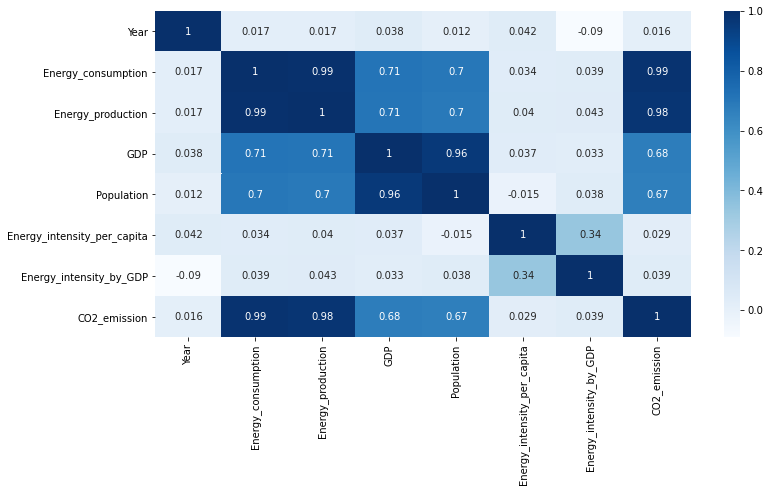

In [1592]:
#correlation between the emissions
plt.figure(figsize=(12,6))
sns.heatmap(co2.corr(),cmap='Blues',annot=True)
plt.yticks(rotation='360')
plt.show()

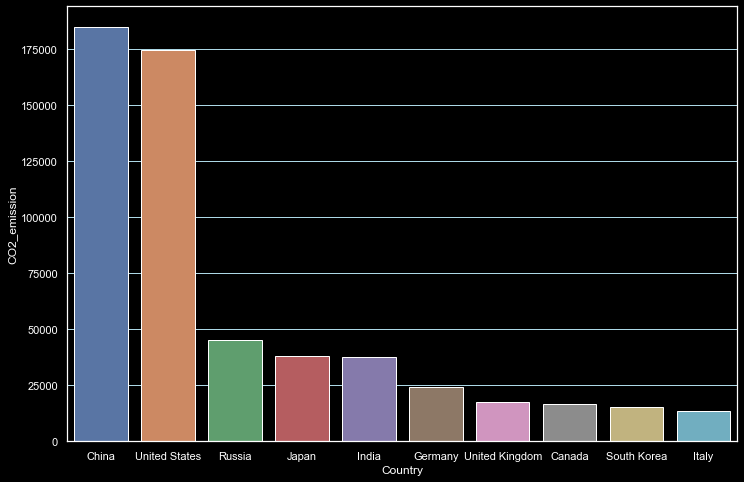

In [1693]:
#Here I want to see the total emissions by country

countries = contALL
top_countries = countries.groupby('Country').sum().sort_values(by='CO2_emission', ascending=False).head(10)
sns.set_palette('Blues_r')
sns.set(rc= {
    'axes.facecolor':'black', 
    'figure.facecolor': 'black', 
    'xtick.color': 'white', 
    'ytick.color': 'white',
    'axes.labelcolor': 'white',
    'grid.color' : 'lightblue',
    'text.color' : 'white'
    }
)


#change size: 
plt.figure(figsize = (12,8))

#seaborn barplot

sns.barplot(x= top_countries.index, y =top_countries['CO2_emission'])

In [1700]:
countries = contALL
top_countries = countries.groupby('Country').sum().sort_values(by='CO2_emission', ascending=False).head(10)

fig= go.Figure()

fig.add_trace(go.Bar(x= top_countries.index, y= top_countries['CO2_emission']))
fig.update_yaxes(type='log')

fig.update_layout(
    {
        'title': { 
        'text': f"Top Ten Countries of CO2 Emmisions",
        'x' : 0.5,
        'y': 0.9,
        'font': {'size': 20}
        },
        'xaxis' : {
        'title' : 'Countries',
        'tickfont': {'size' : 10},
        'showticklabels': True
        },
        'yaxis': {
        'title' : 'CO2 Emissions (kg)',
        'tickfont': {'size' : 10}
        },
        'template' : 'plotly_dark'
    }
)

fig.show()

In [1681]:
countries.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Continent
29112,Afghanistan,all_energy_types,2001,0.015914,0.007509,19.42010,21607.000,0.736543,0.819486,1.153149,Asia
29118,Albania,all_energy_types,2001,0.092923,0.051361,19.39310,3129.700,29.690815,4.791567,3.264883,Europe
29124,Algeria,all_energy_types,2001,1.275579,6.170157,286.09200,31451.500,40.557011,4.458632,70.059527,Africa
29136,Angola,all_energy_types,2001,0.120223,1.609219,73.75340,16945.800,7.094574,1.630070,5.418203,Africa
29148,Antigua and Barbuda,all_energy_types,2001,0.007289,0.000000,1.35164,77.098,94.545930,5.392932,0.500000,North America


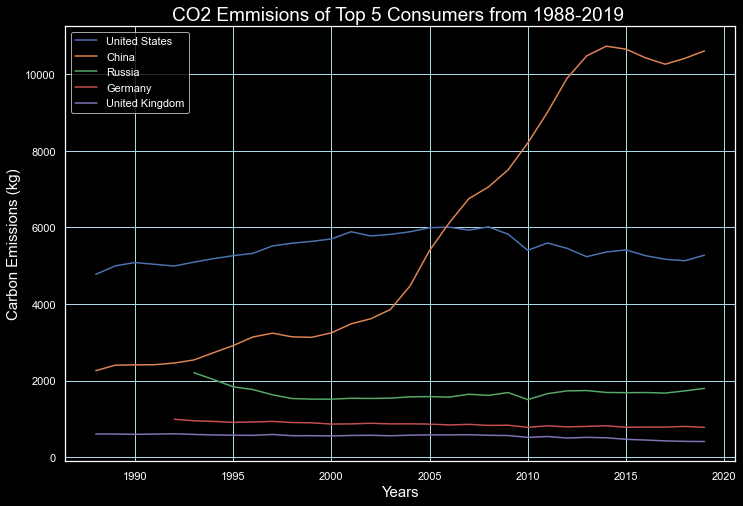

In [1703]:
#Carbon Emissions of top countries from 1988-2019

plt.figure(figsize = (12,8))

sns.lineplot(countries[countries['Country'] == 'United States']['Year'], countries[countries['Country'] == 'United States']['CO2_emission'], label = 'United States')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['CO2_emission'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['CO2_emission'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['CO2_emission'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['CO2_emission'], label = 'United Kingdom')

plt.title('CO2 Emmisions of Top 5 Consumers from 1988-2019 ', size = 19)
plt.ylabel('Carbon Emissions (kg)', size = 15)
plt.xlabel('Years', size = 15);

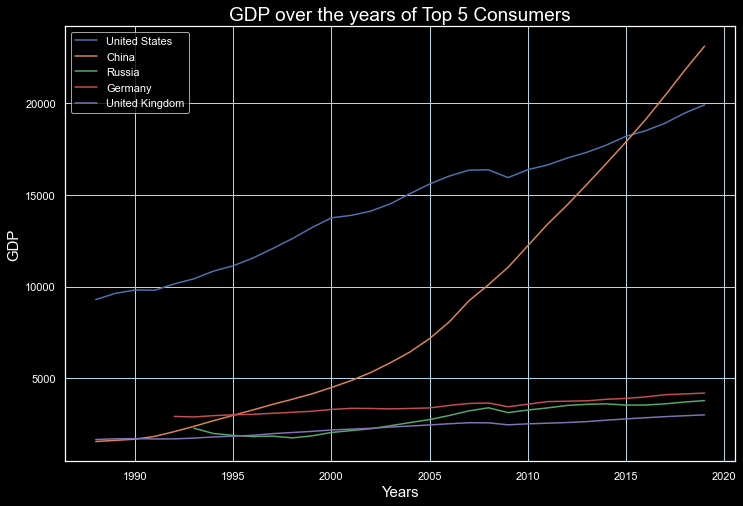

In [1705]:
plt.figure(figsize = (12,8))

sns.lineplot(countries[countries['Country'] == 'United States']['Year'], countries[countries['Country'] == 'United States']['GDP'], label = 'United States')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['GDP'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['GDP'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['GDP'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['GDP'], label = 'United Kingdom')

plt.title('GDP over the years of Top 5 Consumers', size = 19)
plt.ylabel('GDP', size = 15)
plt.xlabel('Years', size = 15);

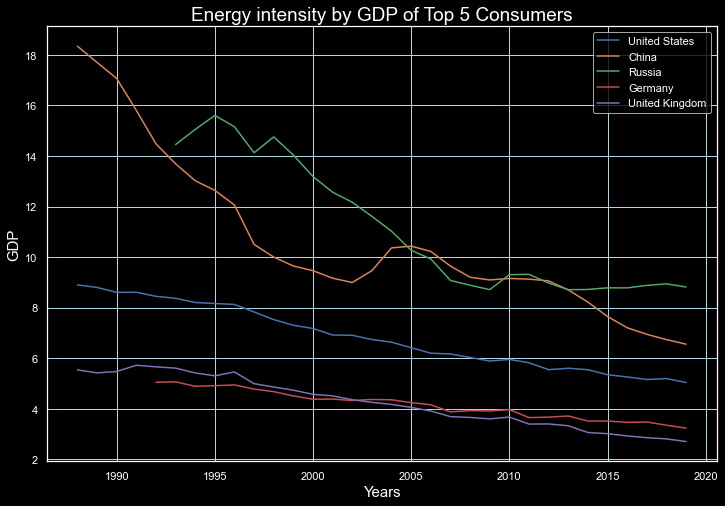

In [1706]:
plt.figure(figsize = (12,8))

sns.lineplot(countries[countries['Country'] == 'United States']['Year'], countries[countries['Country'] == 'United States']['Energy_intensity_by_GDP'], label = 'United States')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['Energy_intensity_by_GDP'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['Energy_intensity_by_GDP'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['Energy_intensity_by_GDP'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['Energy_intensity_by_GDP'], label = 'United Kingdom')

plt.title('Energy intensity by GDP of Top 5 Consumers', size = 19)
plt.ylabel('GDP', size = 15)
plt.xlabel('Years', size = 15);

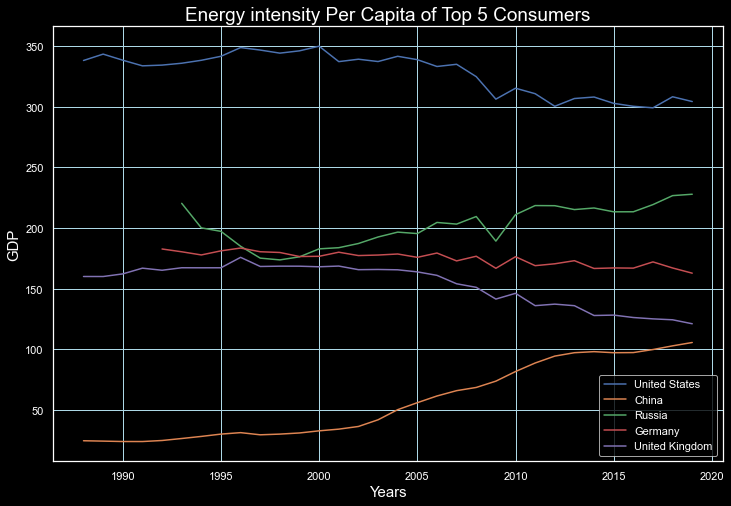

In [1707]:
plt.figure(figsize = (12,8))

sns.lineplot(countries[countries['Country'] == 'United States']['Year'], countries[countries['Country'] == 'United States']['Energy_intensity_per_capita'], label = 'United States')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['Energy_intensity_per_capita'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['Energy_intensity_per_capita'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['Energy_intensity_per_capita'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['Energy_intensity_per_capita'], label = 'United Kingdom')

plt.title('Energy intensity Per Capita of Top 5 Consumers', size = 19)
plt.ylabel('GDP', size = 15)
plt.xlabel('Years', size = 15);